<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = pd.read_csv("../../../DATA/Sacramento_transactions.csv")
house_csv.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


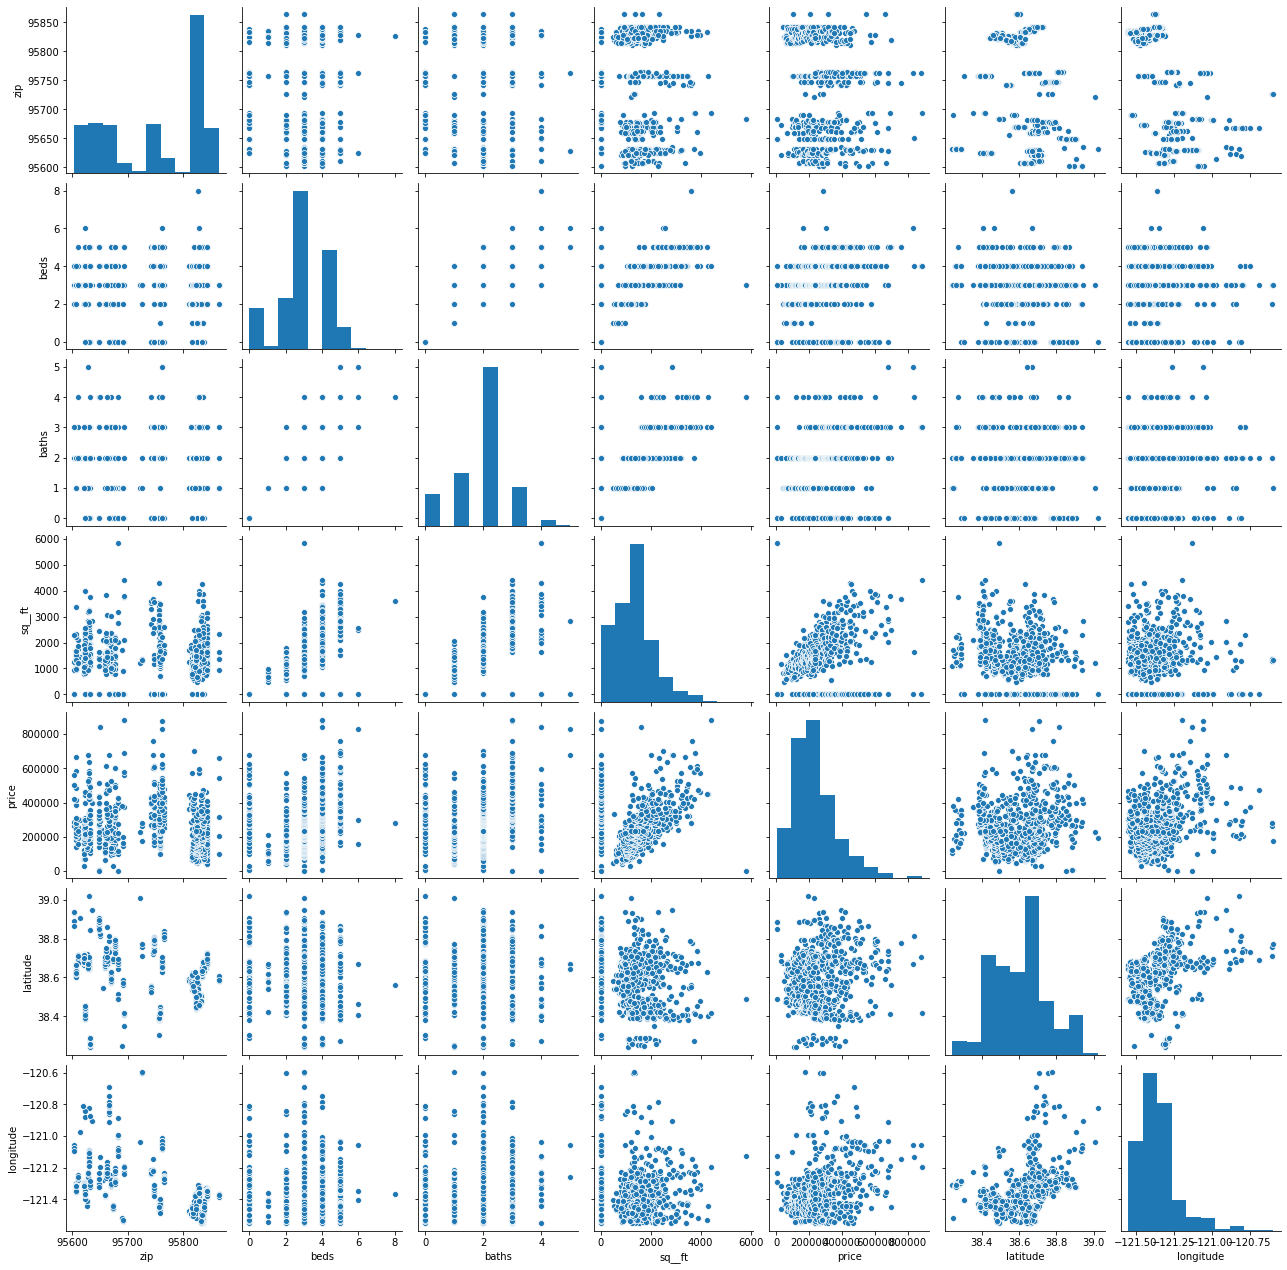

In [41]:
sns.pairplot(house_csv)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [4]:
# ANSWER
# As per the previous lab, 'price'

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [3]:
# ANSWER
# ZIP code, no. beds, no. baths, sq.feet ect, as per last lab

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [5]:
# ANSWER
house_corr_matrix = house_csv.corr()
house_corr_matrix

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [50]:
# again, we will be using sq ft based of the previous reasons

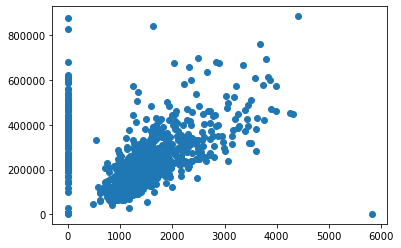

In [51]:
plt.scatter(house_csv['sq__ft'],house_csv['price'])

In [52]:
#ingnore the outliers, for this exercise as they were dealt with previously

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [60]:
from sklearn.linear_model import LinearRegression

In [79]:
X = house_csv['sq__ft'].values.reshape(-1,1) # same as X = house_csv[['sq__ft']]
Y = house_csv['price']

In [80]:
linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression()

In [81]:
print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.4.1 Fit predictor and target variables using linear regression 

In [82]:
# ANSWER

X = house_csv['sq__ft'].values.reshape(-1,1)
Y = house_csv['price']

#note: it is standard for X to be uppercase, and y lower case as X is generaly 2 dimenasional (a variable), y generaly represents a vector

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [83]:
# ANSWER
linreg.score(X,Y)

0.11148717682951437

### 3. Splitting Data

In [30]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [84]:
# ANSWER
## Create training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [86]:
# ANSWER
# Check X train data
print(X_train.shape)
print(X_train[:5])
print(type(X_train))

(659, 1)
[[1758]
 [1643]
 [2354]
 [   0]
 [1354]]
<class 'numpy.ndarray'>


In [88]:
# Check Y train data
print(Y_train.shape)
print(Y_train[:5])
print(type(Y_train))

(659,)
433    217500
172     99000
125    335750
541    488750
879    104000
Name: price, dtype: int64
<class 'pandas.core.series.Series'>


In [90]:
# Check X test data
print(X_test.shape)
print(X_test[:5])
print(type(X_test))

(326, 1)
[[ 906]
 [2382]
 [1962]
 [1739]
 [1527]]
<class 'numpy.ndarray'>


In [91]:
# Check Y test data
print(Y_test.shape)
print(Y_test[:5])
print(type(Y_test))

(326,)
613     77000
451    236000
731    240971
436    221000
275    293993
Name: price, dtype: int64
<class 'pandas.core.series.Series'>


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [92]:
# ANSWER
linreg.fit(X_train,Y_train) #fit linear model?

LinearRegression()

In [95]:
print(linreg.coef_, linreg.intercept_)
print(linreg.score(X_test,Y_test))

[47.43508406] 166482.34144968854
0.13602012247180006


In [96]:
# ANSWER 
# note: sounds obvious, but use the 'test' set to evaluate (test) the model
# when you are trying to fit a model to some data, we are trying to evaluated whether it fits the data. 

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [97]:
# ANSWER
beta0 = linreg.intercept_
beta1 = linreg.coef_
predicted_x = 1204

In [98]:
# Yhat(predicted) = beta0 + beta1*predictedx (𝑦̂=𝛽0+𝛽1𝑥)
predicted_y = beta0 + beta1 * predicted_x
predicted_y

array([223594.18266381])

In [ ]:
#why is the above an array?

#### Find the error

In [ ]:
# Predict price from X_test



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



